In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1823,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,9.205242e+10
1824,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,1.061025e+11
1825,2021-02-24,48835.085938,51290.136719,47213.500000,49705.332031,49705.332031,6.369552e+10
1826,2021-02-25,49709.082031,51948.968750,47093.851563,47093.851563,47093.851563,5.450657e+10
1827,2021-02-26,47050.960938,47677.535156,44575.417969,46104.664063,46104.664063,6.743713e+10


In [3]:
data_training =pd.read_csv('btc-train.csv', date_parser = True)
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-03-01,437.916992,439.653015,432.319000,435.122986,435.122986,74895800
1,2016-03-02,435.131012,435.916992,423.989014,423.989014,423.989014,74955296
2,2016-03-03,423.911987,425.372986,419.411011,421.651001,421.651001,100484000
3,2016-03-04,421.835999,425.178009,410.938995,410.938995,410.938995,90856096
4,2016-03-05,410.781006,411.256989,394.035004,400.570007,400.570007,135384992
...,...,...,...,...,...,...,...
1468,2020-03-08,8908.206055,8914.343750,8105.252930,8108.116211,8108.116211,39973102121
1469,2020-03-09,8111.146484,8177.793457,7690.098145,7923.644531,7923.644531,46936995808
1470,2020-03-10,7922.146973,8136.945313,7814.763184,7909.729492,7909.729492,42213940994
1471,2020-03-11,7910.089844,7950.814453,7642.812500,7911.430176,7911.430176,38682762605


In [4]:
data_test = pd.read_csv('btc-test.csv', date_parser = True)
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-04,8788.541992,8843.366211,8712.431641,8755.246094,8755.246094,3.474671e+10
1,2020-03-05,8760.285156,9142.054688,8757.253906,9078.762695,9078.762695,3.969805e+10
2,2020-03-06,9078.308594,9167.695313,9032.079102,9122.545898,9122.545898,4.082689e+10
3,2020-03-07,9121.600586,9163.220703,8890.744141,8909.954102,8909.954102,3.621693e+10
4,2020-03-08,8908.206055,8914.343750,8105.252930,8108.116211,8108.116211,3.997310e+10
...,...,...,...,...,...,...,...
355,2021-02-22,57532.738281,57533.390625,48967.566406,54207.320313,54207.320313,9.205242e+10
356,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,1.061025e+11
357,2021-02-24,48835.085938,51290.136719,47213.500000,49705.332031,49705.332031,6.369552e+10
358,2021-02-25,49709.082031,51948.968750,47093.851563,47093.851563,47093.851563,5.450657e+10


In [5]:
# Check for missing values in the columns
data_training.isna().values.any()

False

In [6]:
data_test.isna().values.any()

True

In [8]:
data_test = data_test .fillna(0)

In [9]:
data_test.isna().values.any()

False

In [10]:
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,437.916992,439.653015,432.319000,435.122986,74895800
1,435.131012,435.916992,423.989014,423.989014,74955296
2,423.911987,425.372986,419.411011,421.651001,100484000
3,421.835999,425.178009,410.938995,410.938995,90856096
4,410.781006,411.256989,394.035004,400.570007,135384992


In [11]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[1.96023368e-03, 1.45690531e-03, 2.06048778e-03, 1.80935675e-03,
        8.59688886e-04],
       [1.81418179e-03, 1.26704760e-03, 1.61215855e-03, 1.22632953e-03,
        8.60791647e-04],
       [1.22603695e-03, 7.31220922e-04, 1.36576527e-03, 1.10390015e-03,
        1.33396740e-03],
       ...,
       [3.94312620e-01, 3.92618916e-01, 3.99391947e-01, 3.93214965e-01,
        7.81908911e-01],
       [3.93680539e-01, 3.83160093e-01, 3.90137368e-01, 3.93304021e-01,
        7.16458350e-01],
       [3.93865405e-01, 3.82057429e-01, 2.40382318e-01, 2.39318148e-01,
        1.00000000e+00]])

In [12]:
X_train = []
Y_train = []

In [13]:
training_data.shape[0]

1473

In [14]:
for i in range(60, training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])

In [15]:
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [16]:
X_train.shape

(1413, 60, 5)

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [18]:
regressor = Sequential()
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units =1))

In [20]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
regressor.fit(X_train, Y_train, epochs = 20, batch_size =50)

Epoch 1/20
29/29 [==============================] - 3s 116ms/step - loss: 0.0288
Epoch 2/20
29/29 [==============================] - 4s 128ms/step - loss: 0.0086
Epoch 3/20
29/29 [==============================] - 4s 126ms/step - loss: 0.0071
Epoch 4/20
29/29 [==============================] - 3s 120ms/step - loss: 0.0062
Epoch 5/20
29/29 [==============================] - 3s 117ms/step - loss: 0.0058
Epoch 6/20
29/29 [==============================] - 3s 116ms/step - loss: 0.0053
Epoch 7/20
29/29 [==============================] - 4s 129ms/step - loss: 0.0054
Epoch 8/20
29/29 [==============================] - 4s 125ms/step - loss: 0.0051
Epoch 9/20
29/29 [==============================] - 3s 119ms/step - loss: 0.0062
Epoch 10/20
29/29 [==============================] - 3s 116ms/step - loss: 0.0050
Epoch 11/20
29/29 [==============================] - 3s 116ms/step - loss: 0.0050
Epoch 12/20
29/29 [==============================] - 3s 119ms/step - loss: 0.0043
Epoch 13/20
29/29 [======

In [23]:
past_60_days = data_training.tail(60)
df= past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,8189.771973,8197.788086,8079.700684,8144.194336,2.248291e+10
1,8140.933105,8879.511719,8140.933105,8827.764648,4.484178e+10
2,8825.343750,8890.117188,8657.187500,8807.010742,4.010283e+10
3,8812.481445,8846.460938,8612.095703,8723.786133,3.131398e+10
4,8725.209961,8958.122070,8677.316406,8929.038086,3.637214e+10


In [24]:
inputs = scaler.transform(df)
inputs

array([[0.40834256, 0.39571083, 0.41365118, 0.40549265, 0.41619332],
       [0.40578224, 0.43035475, 0.41694678, 0.44128761, 0.83061611],
       [0.4416617 , 0.4308937 , 0.44473217, 0.44020084, 0.74277945],
       ...,
       [2.53912769, 2.58558346, 2.51987633, 2.5818296 , 1.18007103],
       [2.58494596, 2.61906407, 2.51343672, 2.44508018, 1.0097533 ],
       [2.43018574, 2.4019978 , 2.44223599, 2.40865951, 1.13614706]])

In [25]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    Y_test.append(inputs[i, 0])

In [26]:
X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test.shape, Y_test.shape

((360, 60, 5), (360,))

In [27]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test


(array([[0.3850382 ],
        [0.3819276 ],
        [0.37921774],
        [0.37753743],
        [0.37714332],
        [0.3776868 ],
        [0.37867135],
        [0.37960202],
        [0.38002986],
        [0.37923312],
        [0.3768372 ],
        [0.37259263],
        [0.36647224],
        [0.3587736 ],
        [0.349909  ],
        [0.34036773],
        [0.3308593 ],
        [0.32212824],
        [0.31456977],
        [0.30825287],
        [0.30322576],
        [0.2996363 ],
        [0.29751933],
        [0.29663292],
        [0.29661745],
        [0.29703575],
        [0.29740483],
        [0.297585  ],
        [0.29761678],
        [0.29771745],
        [0.29826266],
        [0.29938492],
        [0.30098748],
        [0.30288327],
        [0.3051906 ],
        [0.30803776],
        [0.3113265 ],
        [0.31485927],
        [0.3184443 ],
        [0.32165915],
        [0.32426906],
        [0.32620674],
        [0.3274271 ],
        [0.32787943],
        [0.32788783],
        [0

In [28]:
scaler.scale_

array([5.24238816e-05, 5.08181313e-05, 5.38211261e-05, 5.23647108e-05,
       1.85350479e-11])

In [29]:
scale = 1/5.18164146e-05
scale

19298.903787912797

In [30]:
Y_test = Y_test*scale
Y_pred = Y_pred*scale

In [31]:
Y_pred

array([[ 7430.8154],
       [ 7370.784 ],
       [ 7318.487 ],
       [ 7286.0586],
       [ 7278.453 ],
       [ 7288.9414],
       [ 7307.942 ],
       [ 7325.903 ],
       [ 7334.1597],
       [ 7318.7837],
       [ 7272.545 ],
       [ 7190.6294],
       [ 7072.5127],
       [ 6923.937 ],
       [ 6752.8604],
       [ 6568.724 ],
       [ 6385.222 ],
       [ 6216.722 ],
       [ 6070.852 ],
       [ 5948.943 ],
       [ 5851.925 ],
       [ 5782.6523],
       [ 5741.797 ],
       [ 5724.6904],
       [ 5724.3916],
       [ 5732.4644],
       [ 5739.5874],
       [ 5743.0645],
       [ 5743.6777],
       [ 5745.6206],
       [ 5756.1426],
       [ 5777.801 ],
       [ 5808.7285],
       [ 5845.3154],
       [ 5889.844 ],
       [ 5944.791 ],
       [ 6008.2603],
       [ 6076.439 ],
       [ 6145.6265],
       [ 6207.669 ],
       [ 6258.0376],
       [ 6295.4326],
       [ 6318.984 ],
       [ 6327.714 ],
       [ 6327.876 ],
       [ 6281.613 ],
       [ 6203.3555],
       [ 6113

In [32]:
Y_test


array([ 8486.35347784,  8457.7653743 ,  8779.51714349,  8823.3166669 ,
        8607.42041624,  7801.01655893,  7609.80132202,  7597.60284189,
        7601.17055007,  4671.43680781,  5233.19279416,  4856.82080363,
        5043.14242123,  4656.00506088,  4883.17303781,  4901.69034296,
        5859.02081166,  5874.06278707,  5852.85364499,  5494.51779911,
        6106.88169371,  6412.49726407,  6348.20638803,  6392.94304052,
        6137.85189202,  5913.62423738,  5589.78578858,  6100.77479642,
        6107.56638565,  6279.01003732,  6471.86487932,  6412.15936462,
        6537.76967177,  6462.40862501,  6953.69570174,  6858.22862735,
        7018.77204647,  6984.22080142,  6542.72998186,  6533.24754416,
        6642.05721523,  6518.2880667 ,  6520.59457864,  6313.08259149,
        -405.22052788,  6770.2170857 ,  6940.82487979,  6865.90794421,
        6555.21844317,  6554.87066324,  6799.57188542,  7116.1153539 ,
        7233.78007476,  7253.66676378,  7364.22768464,  7483.15706082,
      

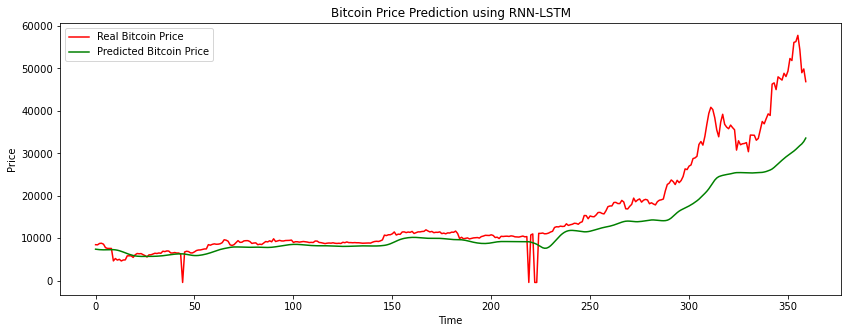

In [33]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.6901798069159535